# Table of Contents
<a id="toc"></a>
- [1. Project Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. EDA](#3)
    - [3.1 Handling Null Values](#3.1)
- [4. Data Preprocessing](#4)
- [5. Feature Engineering](#5)
- [6. Assigning Feature and target variables](#6)
- [7. Feature Scaling](#7)
- [8. Spliting the data into Training and Testing Data](#8)
- [9. Modeling](#9)
    - [9.1 Logistic Regression](#9.1)
    - [9.2 Random Forest](#9.2)
    - [9.3 KNN](#9.3)
    - [9.4 Bagging](#9.4)
    - [9.5 Gradient Boosting](#9.5)
    - [9.6 Decision Tree](#9.6)
    - [9.7 SVM](#9.7)
- [10. TP, TN, FP, FN](#10)
    - [10.1 Logistic Regression](#10.1)
    - [10.2 Random Forest](#10.2)
    - [10.3 KNN](#10.3)
    - [10.4 Bagging](#10.4)
    - [10.5 Gradient Boosting](#10.5)
    - [10.6 Decision Tree](#10.6)
    - [10.7 SVM](#10.7)
- [11. Auto Machine Learning](#11)

<a id='2'></a>
# Import Necssaries Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings("ignore")

<a id='3'></a>
# EDA

In [3]:
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

<a id='3.1'></a>
## Handling Null Values

In [7]:
df.columns[df.isna().any()]

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

in non-categorical columns (continous values) replace null values by mean

In [9]:
df ['LoanAmount'] = df ['LoanAmount'].fillna(df['LoanAmount'].mean())
df ['Loan_Amount_Term'] = df ['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

in categorical columns replace null values with the mode

In [10]:
df ['Credit_History'] = df ['Credit_History'].fillna(df['Credit_History'].mode()[0])
df ['Gender'] = df ['Gender'].fillna(df['Gender'].mode()[0])
df ['Married'] = df ['Married'].fillna(df['Married'].mode()[0])
df ['Dependents'] = df ['Dependents'].fillna(df['Dependents'].mode()[0])
df ['Self_Employed'] = df ['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

why not droping those null columns?<br>
because our dataset is too small so dropping some rows will affect negativily on the model as the model needs a lot of data to give decent accuracy

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
print(df.Gender.value_counts())
print("-"*50)
print(df.Dependents.value_counts())
print("-"*50)
print(df.Self_Employed.value_counts())
print("-"*50)
print(df.Property_Area.value_counts())
print("-"*50)
print(df.Married.value_counts())
print("-"*50)
print(df.Education.value_counts())

Gender
Male      502
Female    112
Name: count, dtype: int64
--------------------------------------------------
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
--------------------------------------------------
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
--------------------------------------------------
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
--------------------------------------------------
Married
Yes    401
No     213
Name: count, dtype: int64
--------------------------------------------------
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


In [13]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y


In [14]:
FEATURES = [col for col in df.columns if col not in ['Loan_Status']]
FEATURES

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [15]:
cat_features = [col for col in df[FEATURES] if df[col].nunique()<=25]
cat_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [16]:
cont_features = [col for col in df[FEATURES] if df[col].nunique() > 25 and col not in ['Loan_ID']]
cont_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

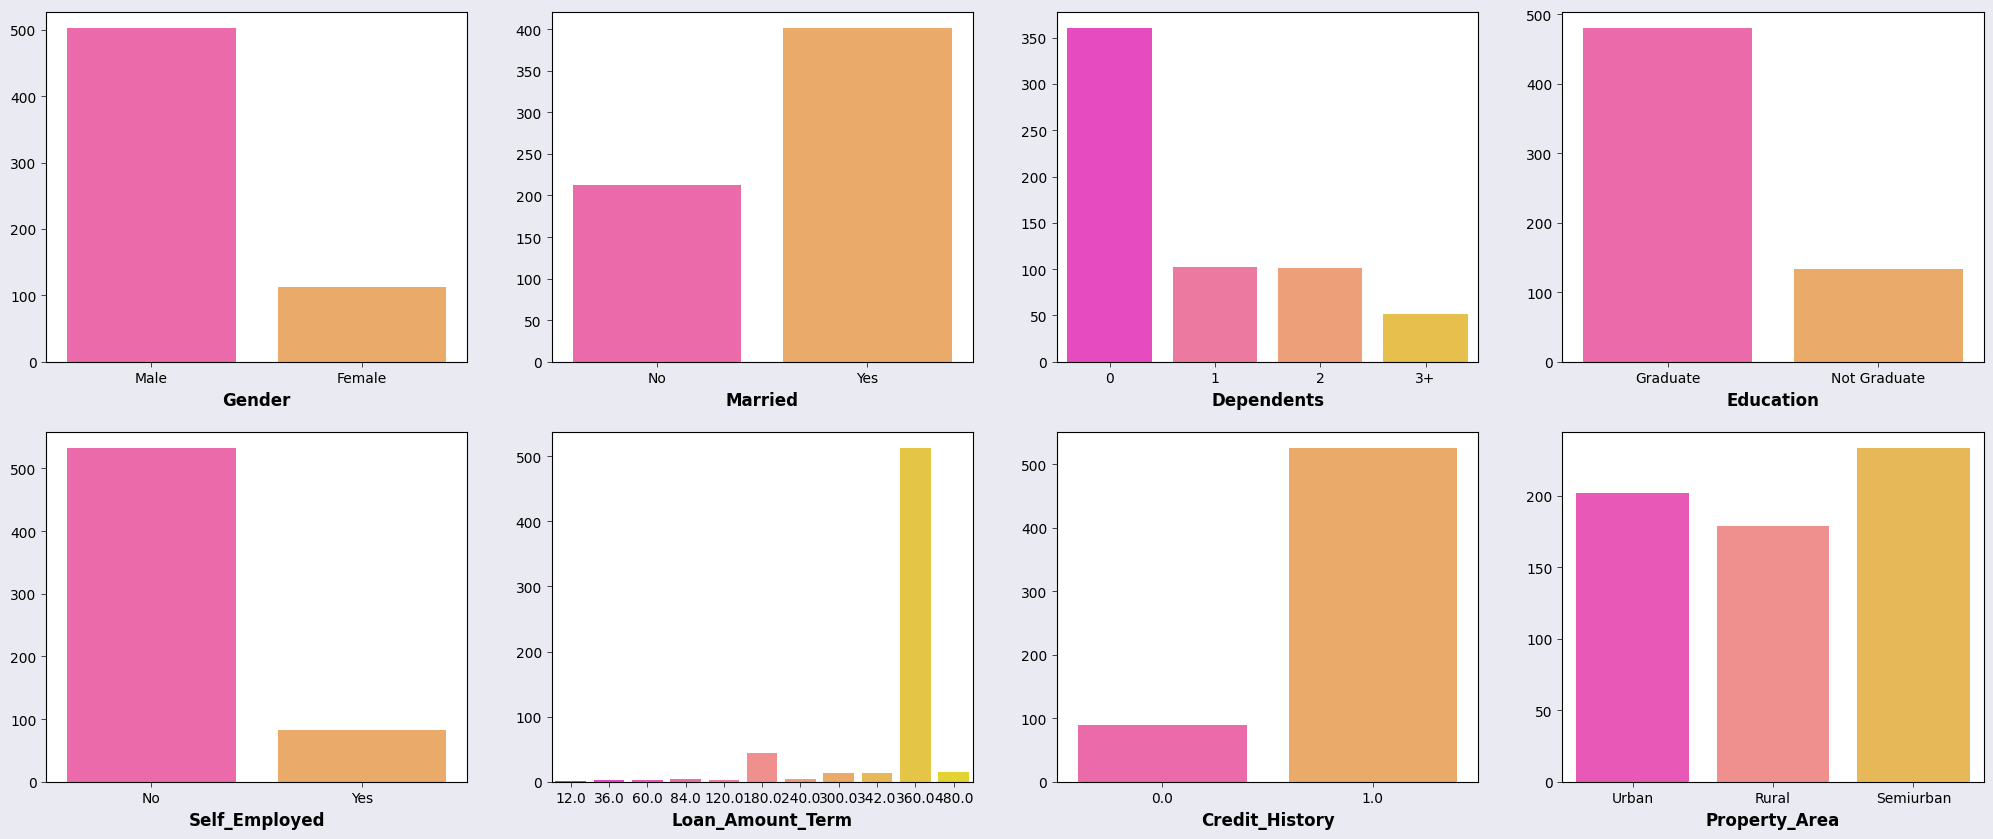

In [20]:
# countplot for all catecorigal columns
ncols = 4
nrows = int(len(cat_features) / ncols + (len(FEATURES) % ncols > 0))
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 10), facecolor='#EAEAF2')
for r in range(nrows):
    for c in range(ncols):
            col = cat_features[r*ncols+c]
            sns.countplot(x=df[col], ax=axes[r, c], color='#58D68D', palette='spring')
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel(col, fontsize=12, fontweight='bold')
            axes[r, c].tick_params(labelsize=10, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(6)
            axes[r, c].yaxis.offsetText.set_fontsize(8)
plt.show()

In [21]:
df.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

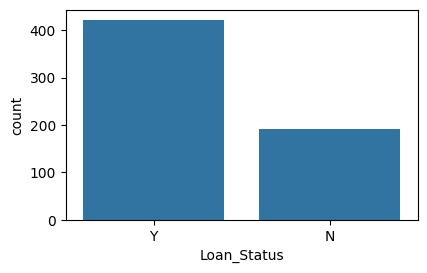

In [22]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
sns.countplot(x = 'Loan_Status', data=df);

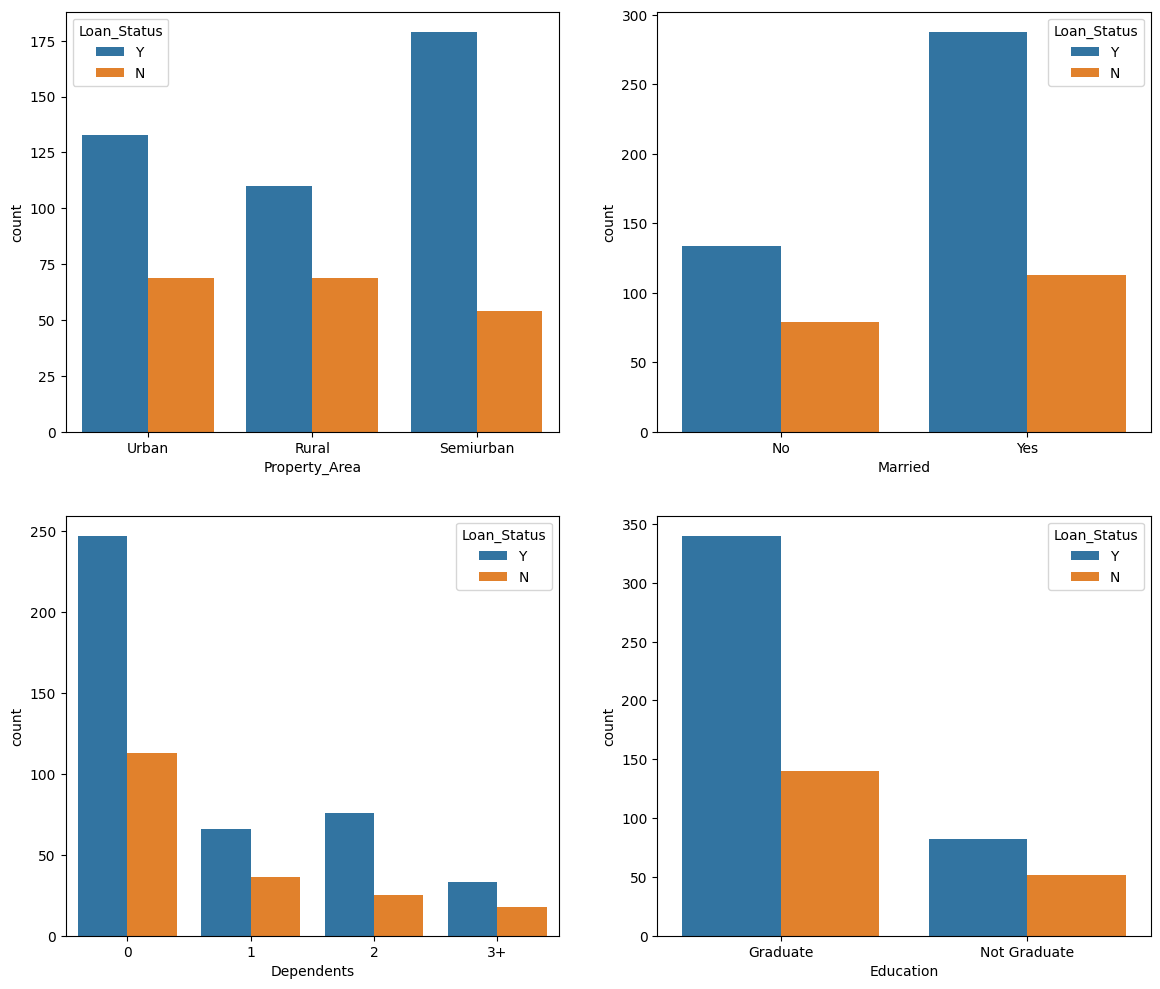

In [23]:
plt.figure(figsize=(14,12))

plt.subplot(2,2,1)
sns.countplot(x = 'Property_Area', hue='Loan_Status', data=df)
plt.subplot(2,2,2)
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.subplot(2,2,3)
sns.countplot(x='Dependents', hue='Loan_Status', data=df)
plt.subplot(2,2,4)
sns.countplot(x='Education', hue='Loan_Status', data=df)

plt.show()

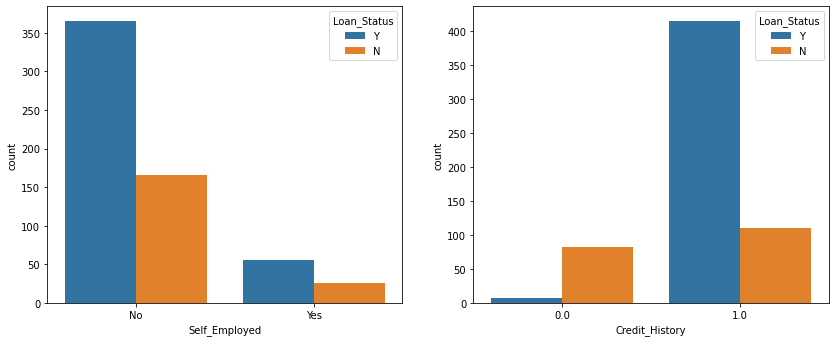

In [ ]:
plt.figure(figsize=(14,12))

plt.subplot(2,2,1)
sns.countplot(x = 'Self_Employed', hue='Loan_Status', data=df)
plt.subplot(2,2,2)
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

plt.show()

- Semiurban seems to be the most property area in which they ask for loans and accept a lot. It seems that this royal area is poor or something.<br>
- Married people apply for loans and accept more than singles
- Graduateed Pepole are more likely to apply for loans

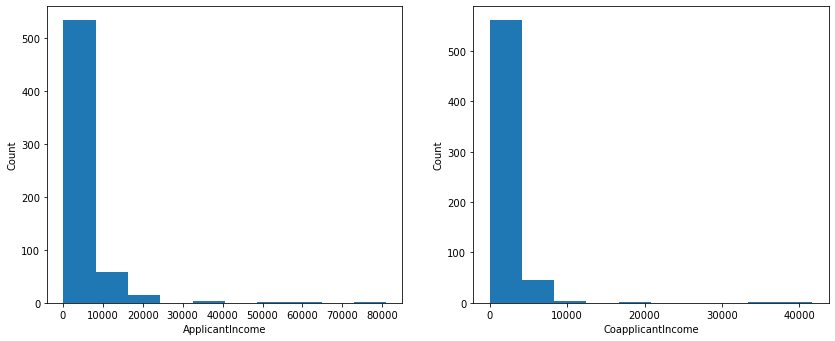

In [ ]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
plt.xlabel('ApplicantIncome')
plt.ylabel('Count')
plt.hist(df.ApplicantIncome);
plt.subplot(2,2,2)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Count')
plt.hist(df.CoapplicantIncome);

most of the ApplicantIncome values in the data between (0-15000) <br>
most of the CoapplicantIncome values in the data between (0-9000)

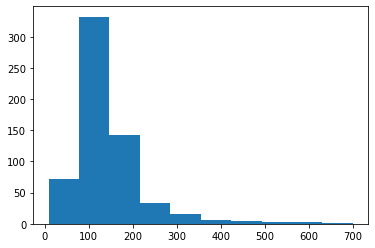

In [ ]:
plt.hist(df.LoanAmount);

Most requested amounts between (100k - 200k)

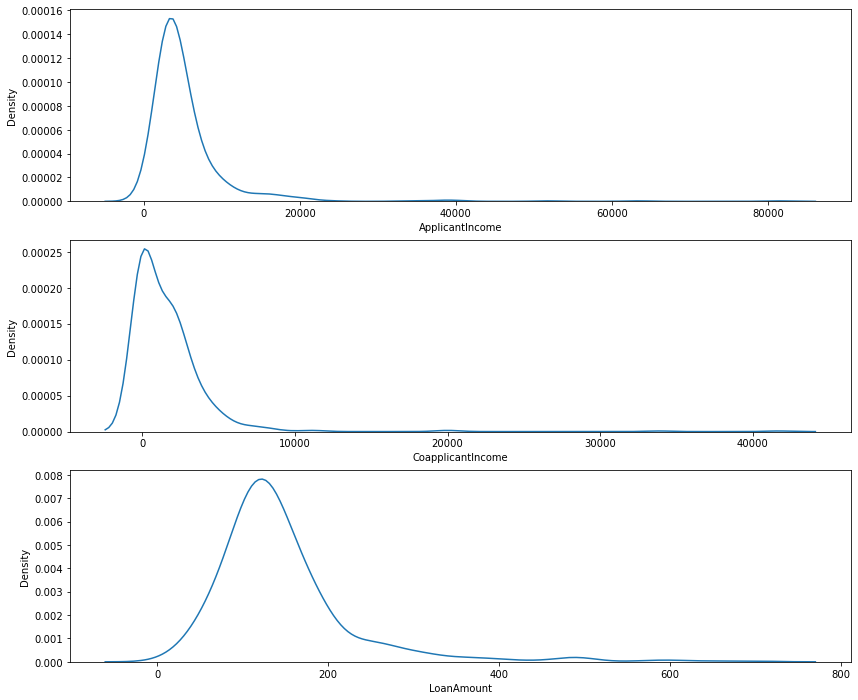

In [ ]:
plt.figure(figsize=(14,12))

plt.subplot(3,1,1)
sns.kdeplot(x = cont_features[0], data=df)
plt.subplot(3,1,2)
sns.kdeplot(x=cont_features[1], data=df)
plt.subplot(3,1,3)
sns.kdeplot(x=cont_features[2], data=df)

plt.show()

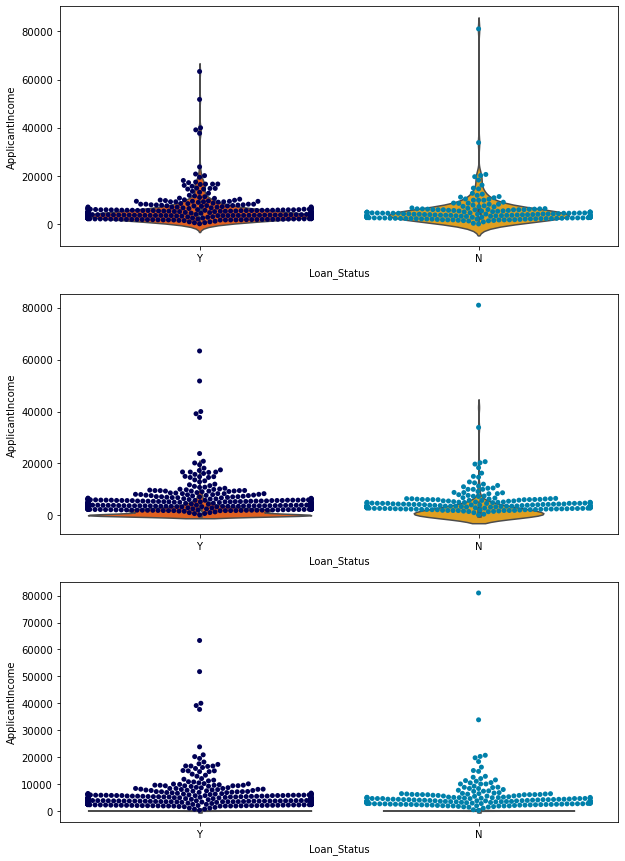

In [ ]:
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
sns.violinplot(y = cont_features[0], x='Loan_Status', data=df, palette='autumn')
sns.swarmplot(y = cont_features[0], x='Loan_Status', data=df, palette='ocean')
plt.subplot(3,1,2)
sns.violinplot(y = cont_features[1], x='Loan_Status', data=df, palette='autumn')
sns.swarmplot(y = cont_features[0], x='Loan_Status', data=df, palette='ocean')
plt.subplot(3,1,3)
sns.violinplot(y = cont_features[2], x='Loan_Status', data=df, palette='autumn')
sns.swarmplot(y = cont_features[0], x='Loan_Status', data=df, palette='ocean')

plt.show()

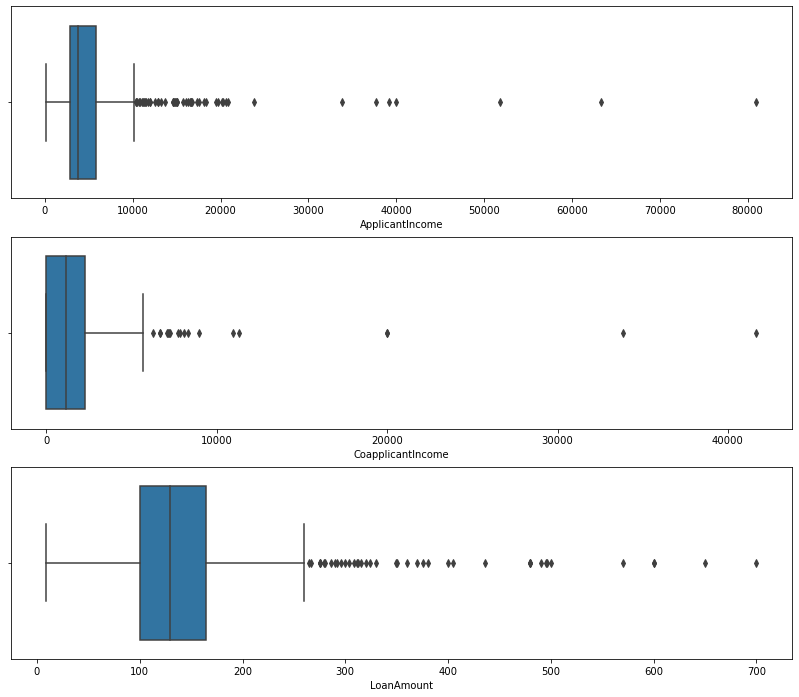

In [ ]:
plt.figure(figsize=(14,12))

plt.subplot(3,1,1)
sns.boxplot(x = cont_features[0], data=df)
plt.subplot(3,1,2)
sns.boxplot(x=cont_features[1], data=df)
plt.subplot(3,1,3)
sns.boxplot(x=cont_features[2], data=df)

plt.show()

<a id='4'></a>
# Data Preprocessing

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [25]:
df2 = df.drop('Loan_ID', axis=1) # drop loan ID as it is not an important Feature

In [26]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


replace the binary features with 0's and 1's

In [27]:
df3 = df2.copy()
df3.Gender = df3.Gender.apply(lambda x: 1 if x=='Male' else 0)
df3.Married = df3.Married.apply(lambda x: 1 if x=='Yes' else 0)
df3.Education = df3.Education.apply(lambda x: 1 if x=='Graduate' else 0)
df3.Self_Employed = df3.Self_Employed.apply(lambda x: 1 if x=='Yes' else 0)
df3.Loan_Status = df3.Loan_Status.apply(lambda x: 1 if x=='Y' else 0)

In [28]:
df3.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1


**apply one hot encoder on Property_Area**

In [29]:
dummies = pd.get_dummies(df.Property_Area)
dummies

,Rural,Semiurban,Urban
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
609,True,False,False
610,True,False,False
611,False,False,True
612,False,False,True


In [45]:
df4 = pd.concat([df3, dummies], axis=1)
df4.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rural,Semiurban,Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1,False,False,True
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0,True,False,False
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1,False,False,True
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1,False,False,True
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1,False,False,True


In [46]:
df4.drop(['Property_Area', 'Urban'], axis=1, inplace=True)
df4.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,False,False
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,True,False
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,False,False
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,False,False
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,False,False


In [47]:
df4.corr()

ValueError: could not convert string to float: '3+'

In [48]:
plt.figure(figsize=(12,10))
sns.heatmap(df4.corr(), annot=True, fmt='.2f');

ValueError: could not convert string to float: '3+'

<Figure size 1200x1000 with 0 Axes>

<a id='5'></a>
# Feature Engineering

In [49]:
df5 = df4.copy()

adding ApplicantIncome and CoapplicantIncome into one column

In [50]:
df5['Total'] = df5['ApplicantIncome'] + df5['CoapplicantIncome']
df5.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Total
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,False,False,5849.0
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,True,False,6091.0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,False,False,3000.0
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,False,False,4941.0
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,False,False,6000.0


In [51]:
df5.Dependents.value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [52]:
df5.Dependents.dtypes

dtype('O')

In [53]:
df5.Dependents = df5.Dependents.replace(to_replace='3+', value=4)
df5.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Total
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,False,False,5849.0
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,True,False,6091.0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,False,False,3000.0
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,False,False,4941.0
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,False,False,6000.0


In [54]:
df5.Dependents.value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

In [55]:
df5.Dependents.dtypes

dtype('O')

In [56]:
df5.Dependents = pd.to_numeric(df5.Dependents)

In [57]:
df5.Dependents.dtypes

dtype('int64')

In [58]:
FEATURES = [col for col in df5.columns if col not in ['Loan_Status']]

In [59]:
FEATURES

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Rural',
 'Semiurban',
 'Total']

In [60]:
df5["mean"] = df5[FEATURES].mean(axis=1)
df5["std"] = df5[FEATURES].std(axis=1)
df5["min"] = df5[FEATURES].min(axis=1)
df5["max"] = df5[FEATURES].max(axis=1)

In [61]:
df5.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Total,mean,std,min,max
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,False,False,5849.0,939.031705,2181.54178,0,5849
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,True,False,6091.0,975.076923,2003.416851,0,6091.0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,False,False,3000.0,494.692308,1116.265902,0,3000
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,False,False,4941.0,797.307692,1541.791241,0,4941.0
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,False,False,6000.0,961.846154,2238.350577,0,6000


In [62]:
df5.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Total,mean,std,min,max
Gender,1.000000,0.364569,0.165877,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,0.017987,0.080283,-0.108623,0.093191,0.093234,0.074361,NaN,0.093191
Married,0.364569,1.000000,0.308408,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.091478,-0.006805,0.005845,0.083319,0.083538,0.061991,NaN,0.083319
Dependents,0.165877,0.308408,1.000000,-0.059001,0.048028,0.134080,0.034780,0.170666,-0.101674,-0.047203,0.002474,0.008583,0.003392,0.142580,0.142758,0.145406,NaN,0.142580
Education,-0.045364,-0.012304,-0.059001,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.073658,0.085884,-0.077520,0.039410,0.161362,0.162253,0.158717,NaN,0.161362
Self_Employed,-0.000525,0.004489,0.048028,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.003700,0.022065,0.008710,0.113000,0.113190,0.117151,NaN,0.113000
ApplicantIncome,0.058809,0.051708,0.134080,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.004710,0.015829,-0.014246,0.893037,0.893174,0.911648,NaN,0.893037
CoapplicantIncome,0.082912,0.075948,0.034780,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,-0.059187,0.005329,-0.027044,0.342781,0.342434,0.295465,NaN,0.342781
LoanAmount,0.107930,0.147141,0.170666,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.036416,0.043178,-0.008273,0.620102,0.624499,0.605776,NaN,0.620102
Loan_Amount_Term,-0.073567,-0.100863,-0.101674,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.020974,0.034433,0.061365,-0.069830,-0.064364,-0.071091,NaN,-0.069830
Credit_History,0.009170,0.010938,-0.047203,0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.540556,-0.020906,0.035976,-0.012563,-0.012497,-0.012543,NaN,-0.012563


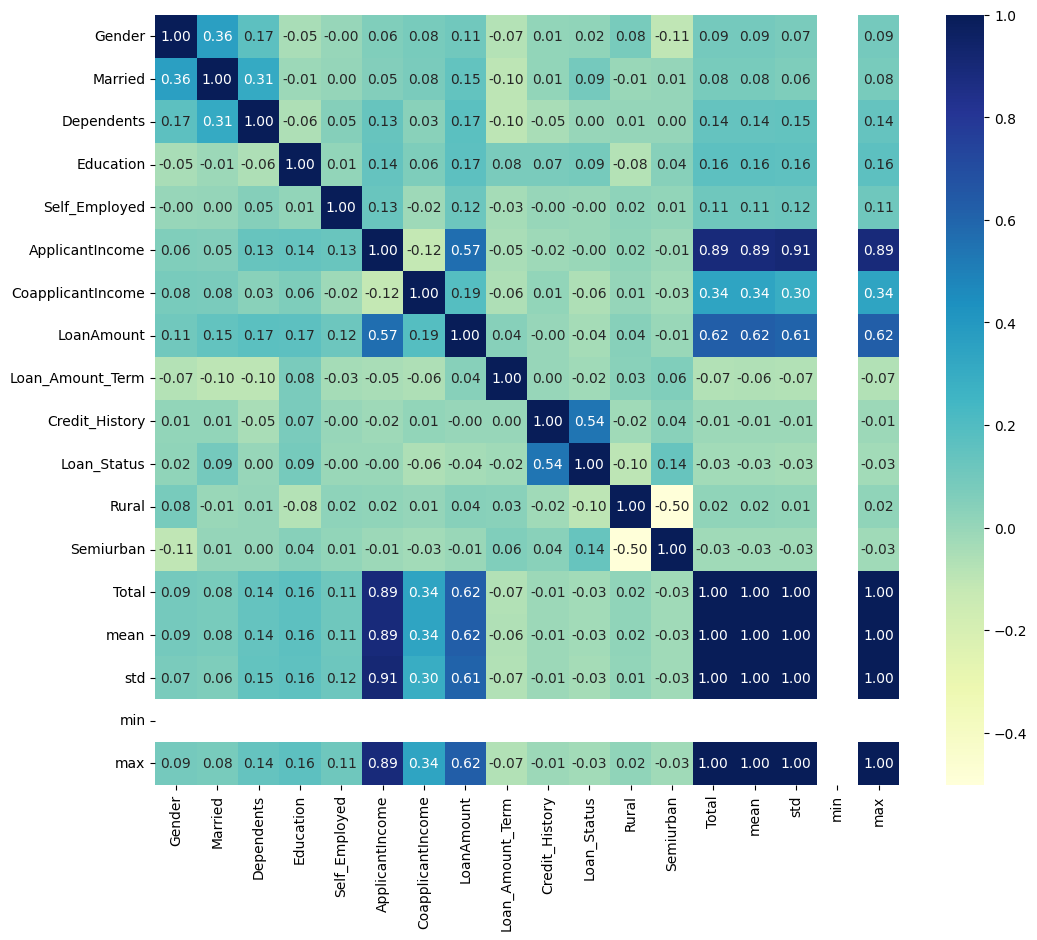

In [63]:
plt.figure(figsize=(12,10))
sns.heatmap(df5.corr(), annot=True, fmt='.2f', cmap='YlGnBu');

<a id='6'></a>
# Assign Feature and target variables

In [64]:
X = df5.drop(['Loan_Status'], axis=1)
y = df5.Loan_Status

<a id='7'></a>
# Feature Scaling

In [65]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale[0]

array([ 0.47234264, -1.37208932, -0.6827291 ,  0.52836225, -0.39260074,
        0.07299082, -0.55448733,  0.        ,  0.27985054,  0.41173269,
       -0.64147818, -0.7820157 , -0.18218376, -0.1802496 , -0.1062661 ,
        0.        , -0.18218376])

<a id='8'></a>
# Splitting the data into Training and Teting data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25, random_state=205)

In [67]:
len(X_train)

460

In [68]:
len(X_test)

154

<a id='9'></a>
# Modeling

In [69]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='d');

def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

def roc(model, model_name):
    y_pred_svm = model.decision_function(X_test)
    svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred_svm)
    auc_svm = auc(svm_fpr, svm_tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(svm_fpr, svm_tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

<a id='9.1'></a>
## Logistic Regression

In [70]:
lr_model = LogisticRegression()
kfolds(lr_model, "Logistic Regression")
train(lr_model, "Logistic Regression")

Logistic Regression score on cross validation: 78.35272342675832%
Logistic Regression model score on Training data: 79.78260869565217%
Logistic Regression model score on Testing data: 85.71428571428571%


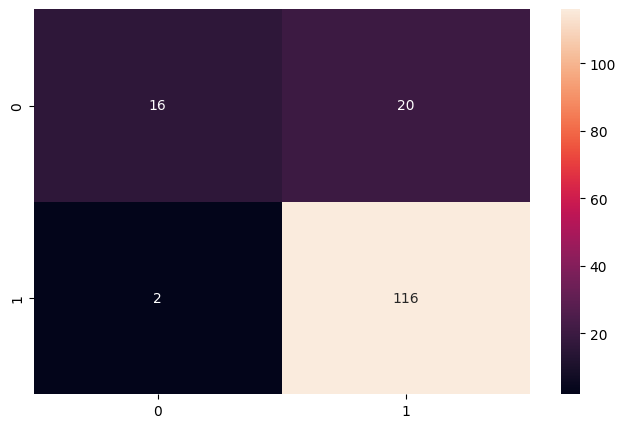

In [71]:
conf_matrix(lr_model)

In [72]:
class_report(lr_model)

              precision    recall  f1-score   support

           0       0.89      0.44      0.59        36
           1       0.85      0.98      0.91       118

    accuracy                           0.86       154
   macro avg       0.87      0.71      0.75       154
weighted avg       0.86      0.86      0.84       154



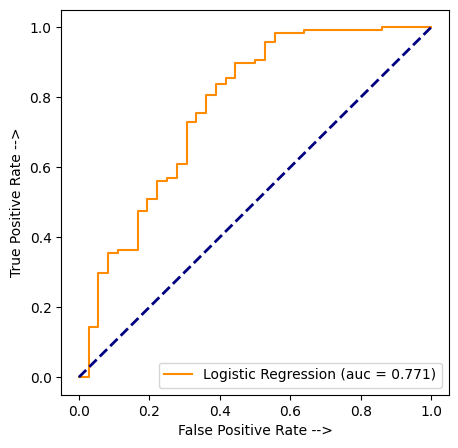

In [73]:
roc(lr_model, "Logistic Regression")

<a id='9.2'></a>
## Random Forest

In [74]:
rf_model = RandomForestClassifier(n_estimators=120, random_state=70)
train(rf_model, "Random Forest")

Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 85.71428571428571%


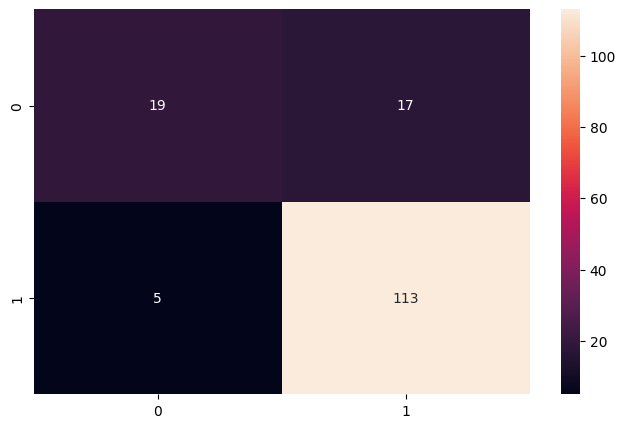

In [75]:
conf_matrix(rf_model)

In [76]:
class_report(rf_model)

              precision    recall  f1-score   support

           0       0.79      0.53      0.63        36
           1       0.87      0.96      0.91       118

    accuracy                           0.86       154
   macro avg       0.83      0.74      0.77       154
weighted avg       0.85      0.86      0.85       154



<a id='9.3'></a>
## KNN

In [77]:
knn_model = KNeighborsClassifier(n_neighbors=3)
kfolds(knn_model, "KNN")
train(knn_model, "KNN")

KNN score on cross validation: 58.79957694341618%
KNN model score on Training data: 83.04347826086956%
KNN model score on Testing data: 85.71428571428571%


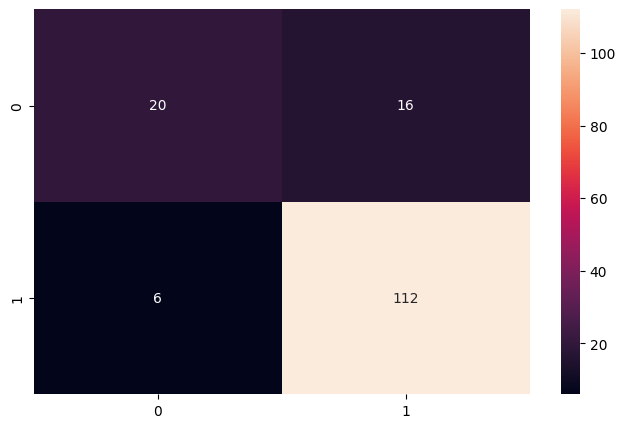

In [78]:
conf_matrix(knn_model)

<a id='9.4'></a>
## Bagging

In [79]:
bagg_model = BaggingClassifier(n_estimators = 90, random_state=20)
kfolds(bagg_model, "Bagging")
train(bagg_model, "Bagging")

Bagging score on cross validation: 78.36594394500264%
Bagging model score on Training data: 100.0%
Bagging model score on Testing data: 84.4155844155844%


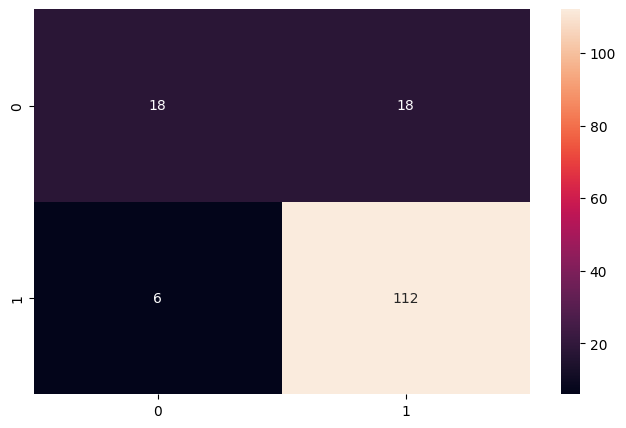

In [80]:
conf_matrix(bagg_model)

In [81]:
class_report(bagg_model)

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        36
           1       0.86      0.95      0.90       118

    accuracy                           0.84       154
   macro avg       0.81      0.72      0.75       154
weighted avg       0.84      0.84      0.83       154



<a id='9.5'></a>
## Gradient Boosting

In [82]:
gb_model = GradientBoostingClassifier(n_estimators=10)
kfolds(gb_model, "Boosting")
train(gb_model, "Boosting")

Boosting score on cross validation: 80.30671602326811%
Boosting model score on Training data: 80.8695652173913%
Boosting model score on Testing data: 85.06493506493507%


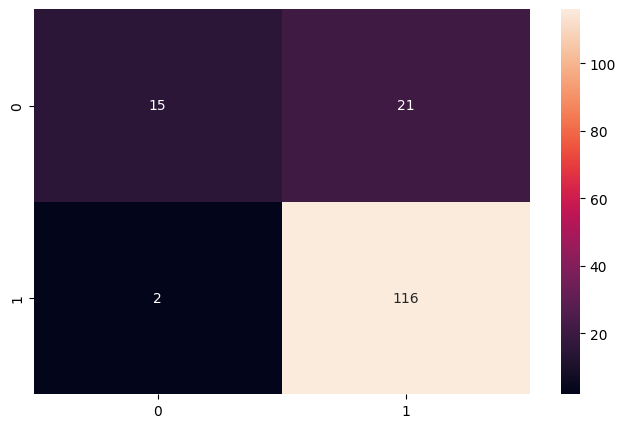

In [83]:
conf_matrix(gb_model)

In [84]:
class_report(gb_model)

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        36
           1       0.85      0.98      0.91       118

    accuracy                           0.85       154
   macro avg       0.86      0.70      0.74       154
weighted avg       0.86      0.85      0.83       154



<a id='9.6'></a>
## Decision Tree

In [85]:
dt_model = DecisionTreeClassifier()
kfolds(dt_model, "Decision Tree")
train(dt_model, "Decision Tree")

Decision Tree score on cross validation: 72.80803807509254%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 66.88311688311688%


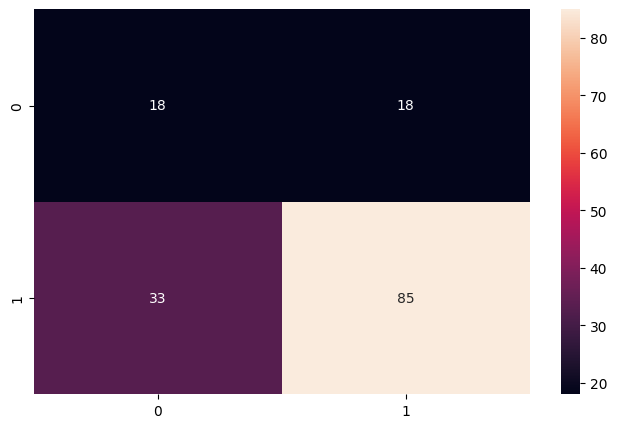

In [86]:
conf_matrix(dt_model)

In [87]:
class_report(dt_model)

              precision    recall  f1-score   support

           0       0.35      0.50      0.41        36
           1       0.83      0.72      0.77       118

    accuracy                           0.67       154
   macro avg       0.59      0.61      0.59       154
weighted avg       0.71      0.67      0.69       154



<a id='9.7'></a>
## SVM

In [88]:
svm_model = SVC(kernel='poly')
kfolds(svm_model, "SVM")
train(svm_model, "SVM")

SVM score on cross validation: 68.73083024854574%
SVM model score on Training data: 82.6086956521739%
SVM model score on Testing data: 85.71428571428571%


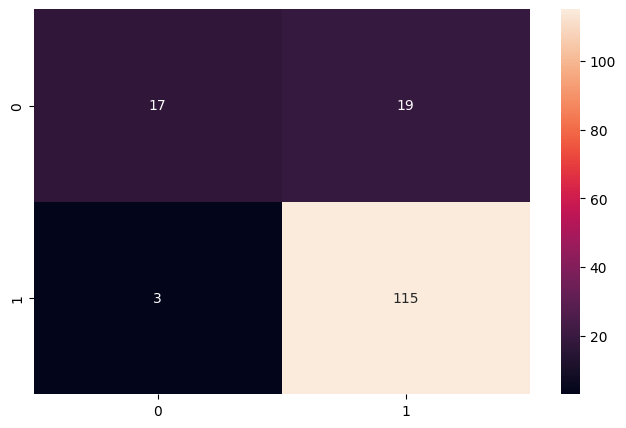

In [89]:
conf_matrix(svm_model)

In [90]:
class_report(svm_model)

              precision    recall  f1-score   support

           0       0.85      0.47      0.61        36
           1       0.86      0.97      0.91       118

    accuracy                           0.86       154
   macro avg       0.85      0.72      0.76       154
weighted avg       0.86      0.86      0.84       154



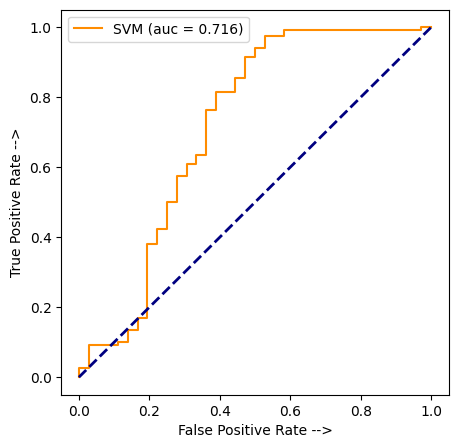

In [91]:
roc(svm_model, "SVM")

<a id='10.'></a>
# TP, TN, FP, FN

In [92]:
def tp(model, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    ACC = (TP+TN)/(TP+FP+FN+TN)
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    FPR = FP/(FP+TN)
    FNR = FN/(TP+FN)
    FDR = FP/(TP+FP)

    print(f"TP, FN, TP, FP Overall Accuarcy of {model_name}: {ACC*100}%")
    print(f"Sensitivity Accuarcy of {model_name}: {TPR * 100}%")
    print(f"Specificity Negative Rate Accuarcy of {model_name}: {TNR * 100}%")
    print(f"Negative predictive value Accuarcy of {model_name}: {NPV * 100}%")
    print(f"Fall out Accuarcy of {model_name}: {FPR * 100}%")
    print(f"False negative rate Accuarcy of {model_name}: {FNR * 100}%")
    print(f"False discovery rate Accuarcy of {model_name}: {FDR * 100}%")

<a id='10.1'></a>
## Logistic Regression

In [93]:
tp(lr_model, "Logistic Regression")

TP, FN, TP, FP Overall Accuarcy of Logistic Regression: 85.71428571428571%
Sensitivity Accuarcy of Logistic Regression: 98.30508474576271%
Specificity Negative Rate Accuarcy of Logistic Regression: 44.44444444444444%
Negative predictive value Accuarcy of Logistic Regression: 88.88888888888889%
Fall out Accuarcy of Logistic Regression: 55.55555555555556%
False negative rate Accuarcy of Logistic Regression: 1.694915254237288%
False discovery rate Accuarcy of Logistic Regression: 14.705882352941178%


<a id='10.2'></a>
## Random Forest

In [94]:
tp(rf_model, "Random Forest")

TP, FN, TP, FP Overall Accuarcy of Random Forest: 85.71428571428571%
Sensitivity Accuarcy of Random Forest: 95.76271186440678%
Specificity Negative Rate Accuarcy of Random Forest: 52.77777777777778%
Negative predictive value Accuarcy of Random Forest: 79.16666666666666%
Fall out Accuarcy of Random Forest: 47.22222222222222%
False negative rate Accuarcy of Random Forest: 4.23728813559322%
False discovery rate Accuarcy of Random Forest: 13.076923076923078%


<a id='10.3'></a>
## KNN

In [95]:
tp(knn_model, "KNN")

TP, FN, TP, FP Overall Accuarcy of KNN: 85.71428571428571%
Sensitivity Accuarcy of KNN: 94.91525423728814%
Specificity Negative Rate Accuarcy of KNN: 55.55555555555556%
Negative predictive value Accuarcy of KNN: 76.92307692307693%
Fall out Accuarcy of KNN: 44.44444444444444%
False negative rate Accuarcy of KNN: 5.084745762711865%
False discovery rate Accuarcy of KNN: 12.5%


<a id='10.4'></a>
## Bagging

In [96]:
tp(bagg_model, "Bagging")

TP, FN, TP, FP Overall Accuarcy of Bagging: 84.4155844155844%
Sensitivity Accuarcy of Bagging: 94.91525423728814%
Specificity Negative Rate Accuarcy of Bagging: 50.0%
Negative predictive value Accuarcy of Bagging: 75.0%
Fall out Accuarcy of Bagging: 50.0%
False negative rate Accuarcy of Bagging: 5.084745762711865%
False discovery rate Accuarcy of Bagging: 13.846153846153847%


<a id='10.5'></a>
## Gradient Boosting

In [97]:
tp(gb_model, "Gradient Boosting")

TP, FN, TP, FP Overall Accuarcy of Gradient Boosting: 85.06493506493507%
Sensitivity Accuarcy of Gradient Boosting: 98.30508474576271%
Specificity Negative Rate Accuarcy of Gradient Boosting: 41.66666666666667%
Negative predictive value Accuarcy of Gradient Boosting: 88.23529411764706%
Fall out Accuarcy of Gradient Boosting: 58.333333333333336%
False negative rate Accuarcy of Gradient Boosting: 1.694915254237288%
False discovery rate Accuarcy of Gradient Boosting: 15.328467153284672%


<a id='10.6'></a>
## Decision Tree

In [98]:
tp(dt_model, "Decision Tree")

TP, FN, TP, FP Overall Accuarcy of Decision Tree: 66.88311688311688%
Sensitivity Accuarcy of Decision Tree: 72.03389830508475%
Specificity Negative Rate Accuarcy of Decision Tree: 50.0%
Negative predictive value Accuarcy of Decision Tree: 35.294117647058826%
Fall out Accuarcy of Decision Tree: 50.0%
False negative rate Accuarcy of Decision Tree: 27.966101694915253%
False discovery rate Accuarcy of Decision Tree: 17.475728155339805%


<a id='10.7'></a>
## SVM

In [99]:
tp(svm_model, "SVM")

TP, FN, TP, FP Overall Accuarcy of SVM: 85.71428571428571%
Sensitivity Accuarcy of SVM: 97.45762711864407%
Specificity Negative Rate Accuarcy of SVM: 47.22222222222222%
Negative predictive value Accuarcy of SVM: 85.0%
Fall out Accuarcy of SVM: 52.77777777777778%
False negative rate Accuarcy of SVM: 2.5423728813559325%
False discovery rate Accuarcy of SVM: 14.17910447761194%
